# Outlier Detection

In [343]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [344]:
df=pd.read_csv('C:Downloads/house_price.csv')
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [345]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB


In [346]:
df.describe(include='all')

,location,size,total_sqft,bath,price,bhk,price_per_sqft
count,13200,13200,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
unique,241,31,NaN,NaN,NaN,NaN,NaN
top,other,2 BHK,NaN,NaN,NaN,NaN,NaN
freq,2872,5192,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,NaN,NaN,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,NaN,NaN,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,NaN,NaN,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,NaN,NaN,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,NaN,NaN,1672.000000,3.000000,120.000000,3.000000,7.317000e+03


In [347]:
df.notnull

<bound method DataFrame.notnull of                        location       size  total_sqft  bath   price  bhk  \
0      Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1              Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2                   Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3            Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                      Kothanur      2 BHK      1200.0   2.0   51.00    2   
...                         ...        ...         ...   ...     ...  ...   
13195                Whitefield  5 Bedroom      3453.0   4.0  231.00    5   
13196                     other      4 BHK      3600.0   5.0  400.00    4   
13197     Raja Rajeshwari Nagar      2 BHK      1141.0   2.0   60.00    2   
13198           Padmanabhanagar      4 BHK      4689.0   4.0  488.00    4   
13199              Doddathoguru      1 BHK       550.0   1.0   17.00    1   

       price_per_sqft  
0               

In [348]:
df.isnull().sum()

location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64

In [349]:
df.duplicated().sum()

1049

In [350]:
df=df.drop_duplicates()
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258


In [351]:
df.shape

(12151, 7)

# Detect the outliers and remove it using following steps
  ## 1.By Using Mean Function.


In [352]:
df.price_per_sqft.min()

267

In [353]:
df.price_per_sqft.max()

12000000

In [354]:
df.price_per_sqft.mean()

8132.641840177763

In [355]:
df.price_per_sqft.median()

5500.0

#### Here we can see there is a considerable difference in mean and median value which indicates the presence of outliers.

C:\Users\Siraj P\AppData\Local\Temp\ipykernel_9700\3216155515.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'],color='b')


Text(0.5, 1.0, 'Distribution of price per sqft')

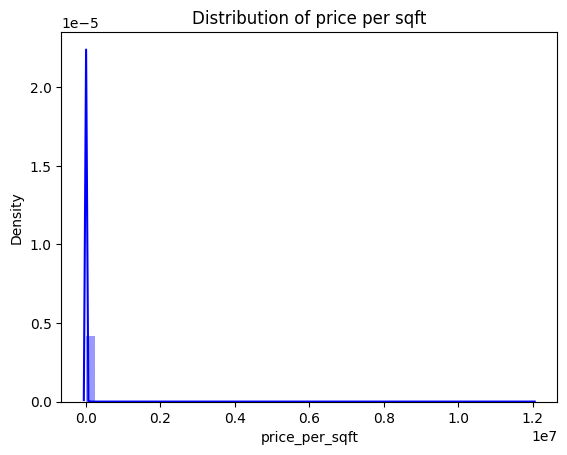

In [356]:
sns.distplot(df['price_per_sqft'],color='b')
plt.title('Distribution of price per sqft')

<Axes: ylabel='price_per_sqft'>

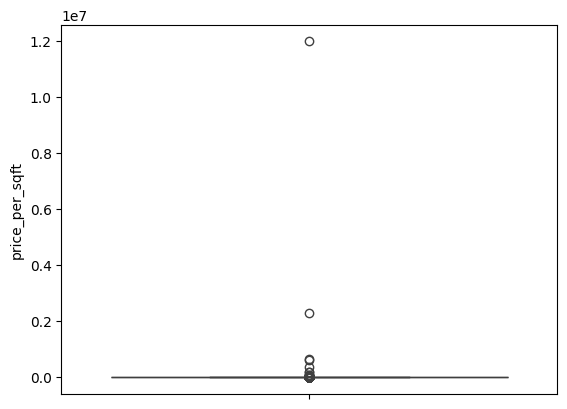

In [357]:
sns.boxplot(df['price_per_sqft'])

#### Finding percentiles using quantile 

In [358]:
df.price_per_sqft.quantile([0.05,0.10,0.25,0.50,0.75,0.90,0.92,0.94,0.96,0.98,0.99])

0.05     3150.0
0.10     3513.0
0.25     4312.0
0.50     5500.0
0.75     7461.0
0.90    11904.0
0.92    13129.0
0.94    14695.0
0.96    16666.0
0.98    20000.0
0.99    24000.0
Name: price_per_sqft, dtype: float64

#### 98th and 99th percentile have considerble difference and variations this shows the existence of outliers.

In [359]:
df[df.price_per_sqft>df.price_per_sqft.quantile(0.95)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.0,4,18181
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333
48,KR Puram,2 Bedroom,800.0,1.0,130.0,2,16250
69,other,3 Bedroom,500.0,3.0,100.0,3,20000
...,...,...,...,...,...,...,...
13081,other,6 Bedroom,8000.0,6.0,2800.0,6,35000
13097,other,1 BHK,250.0,2.0,40.0,1,16000
13141,other,3 Bedroom,2000.0,2.0,360.0,3,18000
13142,other,2 BHK,1140.0,1.0,185.0,2,16228


###### Data without outliers


In [360]:
df1=df[df.price_per_sqft<df.price_per_sqft.quantile(0.95)]
df1

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258


C:\Users\Siraj P\AppData\Local\Temp\ipykernel_9700\1750106396.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['price_per_sqft'],color='g')


Text(0.5, 1.0, 'distribution of price per sqft without outliers')

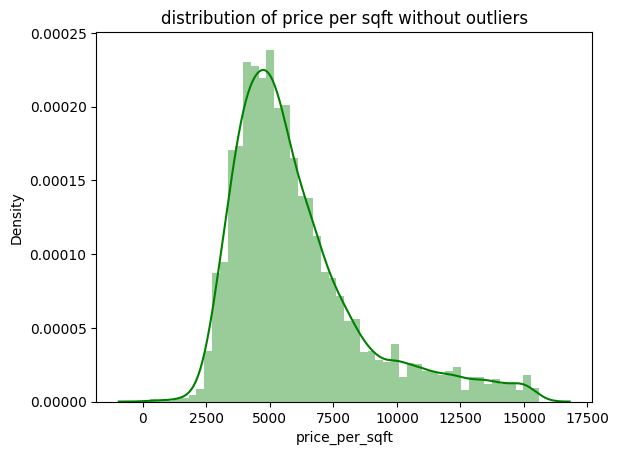

In [361]:
sns.distplot(df1['price_per_sqft'],color='g')
plt.title('distribution of price per sqft without outliers')

<Axes: ylabel='price_per_sqft'>

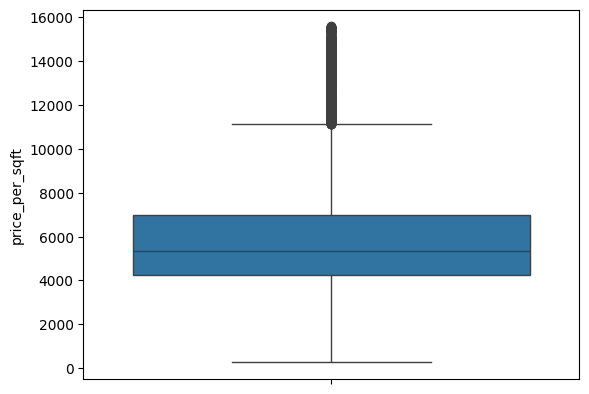

In [362]:
sns.boxplot(df1['price_per_sqft'])

In [363]:
print('Before removing outliers:',len(df))
print('After removing outliers:',len(df1))
print('Total outliers:',len(df)-len(df1))
                                

Before removing outliers: 12151
After removing outliers: 11542
Total outliers: 609


### After removing the outliers using mean method we plotted a graph using distplot.thus we ended up in creating a bell-shaped curve and removed 609 outliers from the dataset.

## 2.Percentile Method

In [364]:
upper_limit=df['price_per_sqft'].quantile(0.95)
lower_limit=df['price_per_sqft']. quantile(0.05)

In [365]:
print('Upper Limit:',upper_limit)
print('Lower Limit:',lower_limit)
      

Upper Limit: 15600.0
Lower Limit: 3150.0


C:\Users\Siraj P\AppData\Local\Temp\ipykernel_9700\4048551420.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'],color='g')


Text(0.5, 1.0, 'Distribution of price per sqft with Outliers')

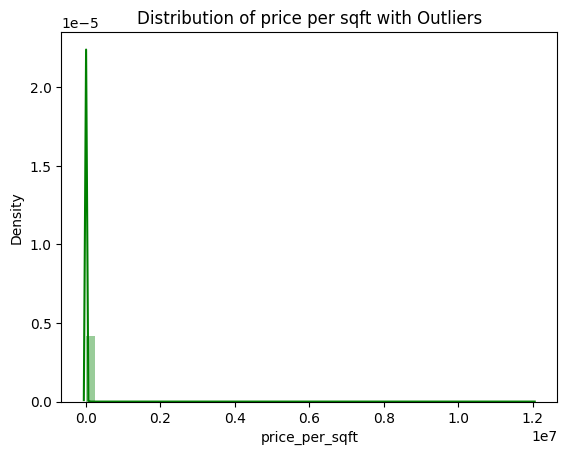

In [366]:
 sns.distplot(df['price_per_sqft'],color='g')
plt.title('Distribution of price per sqft with Outliers')

<Axes: ylabel='price_per_sqft'>

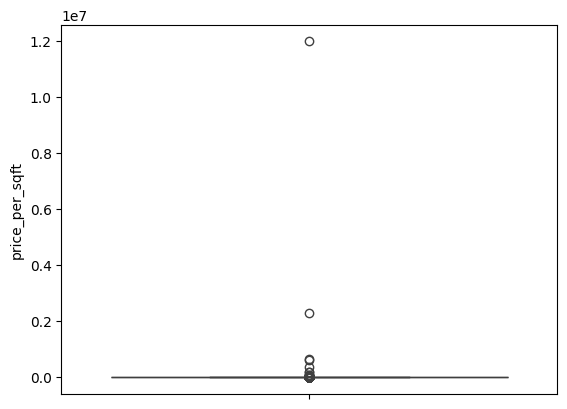

In [367]:
sns.boxplot(df['price_per_sqft'])

### finding outliers

In [368]:
df.loc[(df['price_per_sqft']>upper_limit) | (df['price_per_sqft']<lower_limit)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274
20,Kengeri,1 BHK,600.0,1.0,15.00,1,2500
41,Sarjapur Road,3 BHK,1254.0,3.0,38.00,3,3030
45,HSR Layout,8 Bedroom,600.0,9.0,200.00,8,33333
...,...,...,...,...,...,...,...
13121,Electronic City Phase II,3 BHK,1651.0,3.0,49.53,3,3000
13141,other,3 Bedroom,2000.0,2.0,360.00,3,18000
13142,other,2 BHK,1140.0,1.0,185.00,2,16228
13155,Kothannur,4 Bedroom,1600.0,4.0,45.00,4,2812


### Deleting the outliers

In [369]:
df2=df.loc[(df['price_per_sqft']<=upper_limit) & (df['price_per_sqft']>=lower_limit)]
df2

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258


In [370]:
print("Before removing outliers:",len(df))
print("After removing outliers:",len(df2))
print("Total outliers:",len(df)-len(df2))

Before removing outliers: 12151
After removing outliers: 10940
Total outliers: 1211


C:\Users\Siraj P\AppData\Local\Temp\ipykernel_9700\663922463.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['price_per_sqft'],color='orange')


Text(0.5, 1.0, 'Distribution of price per sqft without outliers')

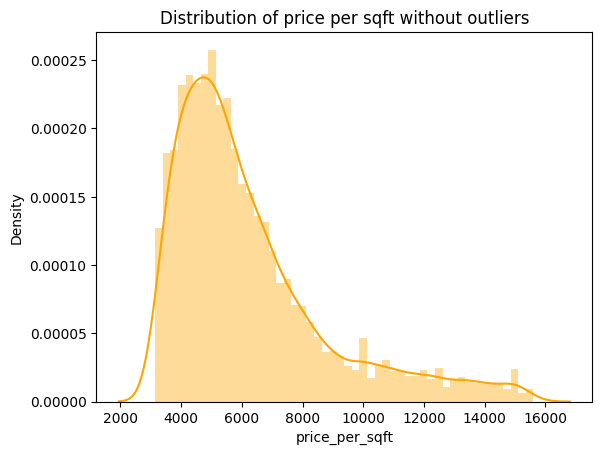

In [371]:
sns.distplot(df2['price_per_sqft'],color='orange')
plt.title('Distribution of price per sqft without outliers')

<Axes: ylabel='price_per_sqft'>

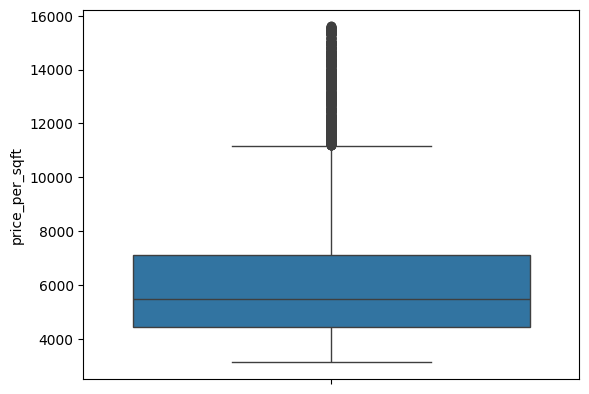

In [372]:
sns.boxplot(df2['price_per_sqft'])

#### After applying the percentile technique to remove outliers, our distplot nearly formed a bell curve, and we managed to get rid of 1211 outliers from the dataset.

In [373]:
#CAPPING -cahne the outliers to upper or lower values
new_df2=df.copy()
new_df2.loc[(new_df2['price_per_sqft']>upper_limit),'price_per_sqft']=upper_limit
new_df2.loc[(new_df2['price_per_sqft']<lower_limit),'price_per_sqft']=lower_limit


<Axes: ylabel='price_per_sqft'>

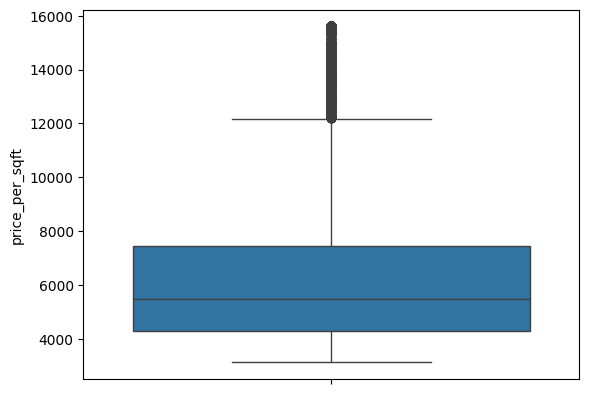

In [374]:
sns.boxplot(new_df2['price_per_sqft'])

### IQR METHOD

C:\Users\Siraj P\AppData\Local\Temp\ipykernel_9700\1749487219.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


Text(0.5, 1.0, 'Distribution of price per sqft with outliers')

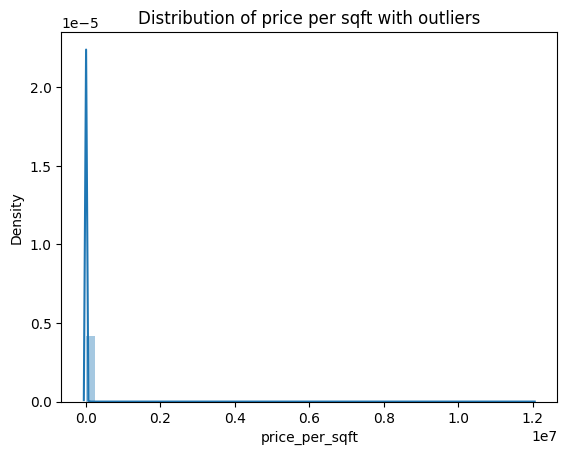

In [375]:
sns.distplot(df['price_per_sqft'])
plt.title('Distribution of price per sqft with outliers')

<Axes: ylabel='price_per_sqft'>

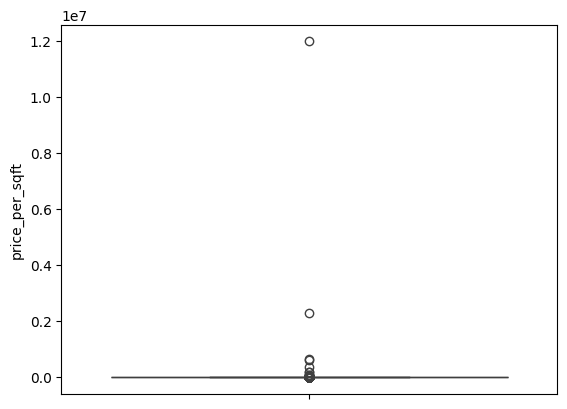

In [376]:
sns.boxplot(df['price_per_sqft'])

In [377]:
Q1=df.price_per_sqft.quantile(0.25)
Q3=df.price_per_sqft.quantile(0.75)
IQR=Q3-Q1
print("Q1=",Q1)
print("Q3=",Q3)
print("IQR=",IQR)

Q1= 4312.0
Q3= 7461.0
IQR= 3149.0


In [378]:
lower_whisker=Q1-1.5*IQR
upper_whisker=Q3+1.5*IQR
print('lower_whisker=',lower_whisker)
print('upper_whisker=',upper_whisker)

lower_whisker= -411.5
upper_whisker= 12184.5


### Finding outliers

In [379]:
df[(df.price_per_sqft<-411.5)|(df.price_per_sqft>12184.5)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.0,4,18181
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274
22,Thanisandra,4 Bedroom,2800.0,5.0,380.0,4,13571
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333
48,KR Puram,2 Bedroom,800.0,1.0,130.0,2,16250
...,...,...,...,...,...,...,...
13114,other,3 BHK,1903.0,2.0,293.0,3,15396
13141,other,3 Bedroom,2000.0,2.0,360.0,3,18000
13142,other,2 BHK,1140.0,1.0,185.0,2,16228
13157,other,7 Bedroom,1400.0,7.0,218.0,7,15571


#### df without outliers

In [380]:
df3=df[(df.price_per_sqft>-411.5)&(df.price_per_sqft<12184.5)]
df3

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258


In [381]:
print('Before removing outliers:',len(df))
print('After removing outliers:',len(df3))
print('Total outliers:',len(df)-len(df3))

Before removing outliers: 12151
After removing outliers: 11009
Total outliers: 1142


C:\Users\Siraj P\AppData\Local\Temp\ipykernel_9700\1925322019.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3['price_per_sqft'],color='purple')


Text(0.5, 1.0, 'Distribution of Price per sqft without Outliers')

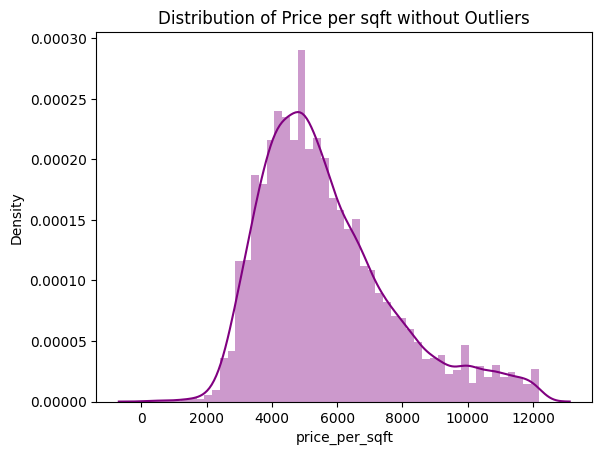

In [382]:
sns.distplot(df3['price_per_sqft'],color='purple')
plt.title('Distribution of Price per sqft without Outliers')
             

<Axes: ylabel='price_per_sqft'>

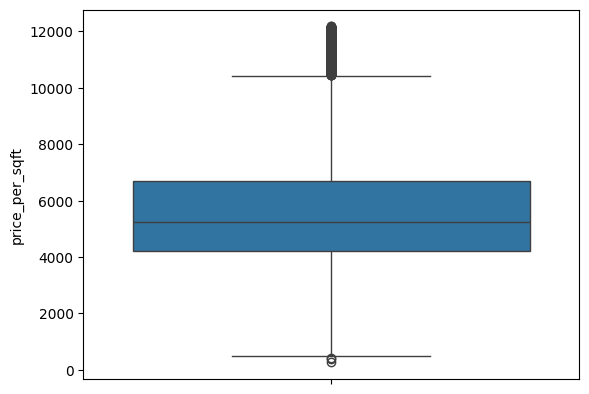

In [383]:
sns.boxplot(df3['price_per_sqft'])

#### We used IQR method to eliminate the outliers from the dataset and plotted a bell shaped curve in the distplot.in conclusion total 1142 outliers are removed from the dataset.

# 4.Normal Distribution

In [384]:
df.price_per_sqft.describe()

count    1.215100e+04
mean     8.132642e+03
std      1.112329e+05
min      2.670000e+02
25%      4.312000e+03
50%      5.500000e+03
75%      7.461000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [385]:
M=df.price_per_sqft.mean()
M

8132.641840177763

In [386]:
std=df.price_per_sqft.std()
std

111232.90089570847

##### +3 sigma

In [387]:
M+3*std

341831.3445273032

##### -3 sigma

In [388]:
M-3*std

-325566.06084694766

#### Finding outliers

In [389]:
df[(df.price_per_sqft<-325566.06084694766) | (df.price_per_sqft>341831.3445273032)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000
4924,other,7 BHK,5.0,7.0,115.0,7,2300000
11447,Whitefield,4 Bedroom,60.0,4.0,218.0,4,363333


#### Data without Outliers

In [390]:
df4=df[(df.price_per_sqft>-325566.06084694766) & (df.price_per_sqft<341831.3445273032)]
df4

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258


In [391]:
print('Before removing outliers:',len(df))
print('After removing outliers:',len(df4))
print('Total outliers:',len(df)-len(df4))

Before removing outliers: 12151
After removing outliers: 12146
Total outliers: 5


C:\Users\Siraj P\AppData\Local\Temp\ipykernel_9700\2982534691.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df4['price_per_sqft'],color='r')


<Axes: xlabel='price_per_sqft', ylabel='Density'>

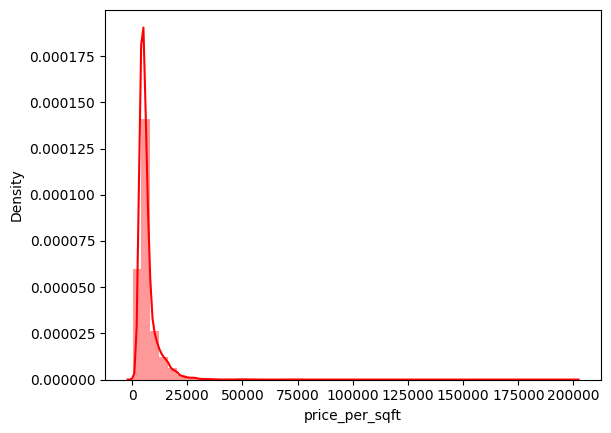

In [392]:
sns.distplot(df4['price_per_sqft'],color='r')

<Axes: ylabel='price_per_sqft'>

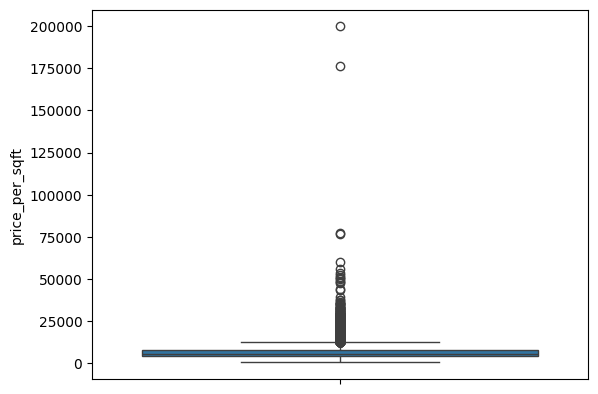

In [393]:
sns.boxplot(df4['price_per_sqft'])

#### We used Normal Distribution method to eliminate the outliers from the dataset containing 12151 data rows.After eliminating outliers 12146 datarows are remaining

# 5.Z Score Method

In [394]:
M=df.price_per_sqft.mean()
M

8132.641840177763

In [395]:
std=df.price_per_sqft.std()
std

111232.90089570847

#### +3 Sigma / upper limit

In [396]:
upper_limit=M+3*std
upper_limit

341831.3445273032

#### -3 Sigma / lower limit

In [397]:
lower_limit=M-3*std
lower_limit

-325566.06084694766

#### Data without outliers

In [398]:
df5=df[(df.price_per_sqft>-325566.06084694766) & (df.price_per_sqft<341831.3445273032)]
df5

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258


In [399]:
print('Before removing outliers:',len(df))
print('After removing outliers:',len(df5))
print('Total outliers:',len(df)-len(df5))

Before removing outliers: 12151
After removing outliers: 12146
Total outliers: 5


C:\Users\Siraj P\AppData\Local\Temp\ipykernel_9700\1165508489.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df5['price_per_sqft'],color='y')


<Axes: xlabel='price_per_sqft', ylabel='Density'>

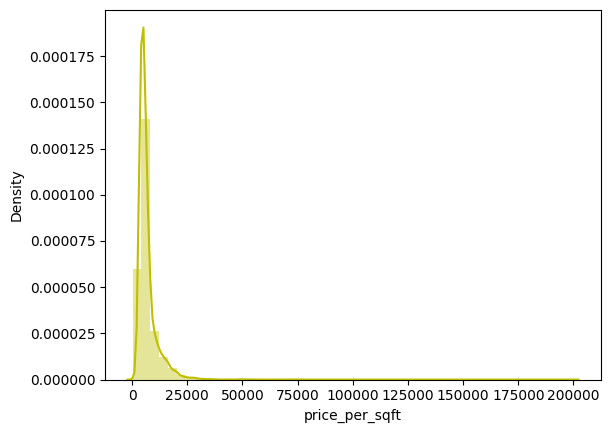

In [400]:
sns.distplot(df5['price_per_sqft'],color='y')

<Axes: ylabel='price_per_sqft'>

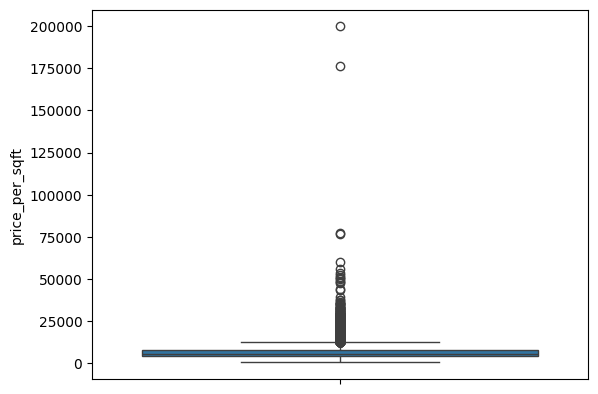

In [401]:
sns.boxplot(df5['price_per_sqft'])

#### Using zscore method, there were 12,151 data rows before removing outliers and  12,146 data rows after removal therefore 5 outliers are present.

#### We identified the same outliers using both the normal distribution and z-score method, therefore both method for outlier removal have same process.

# Correlation between all the numerical columns

In [412]:
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258


### Finding correlation between all the numerical columns and thus creating a "Heatmap".

##### Checking the dataset and selecting the numerical columns

In [403]:
num_colmn=df.select_dtypes(include=['int','float']).columns
num_colmn

Index(['total_sqft', 'bath', 'price', 'bhk', 'price_per_sqft'], dtype='object')

### Finding Correlation matrix

In [404]:
corr_matrix=df[num_colmn].corr()

##### 

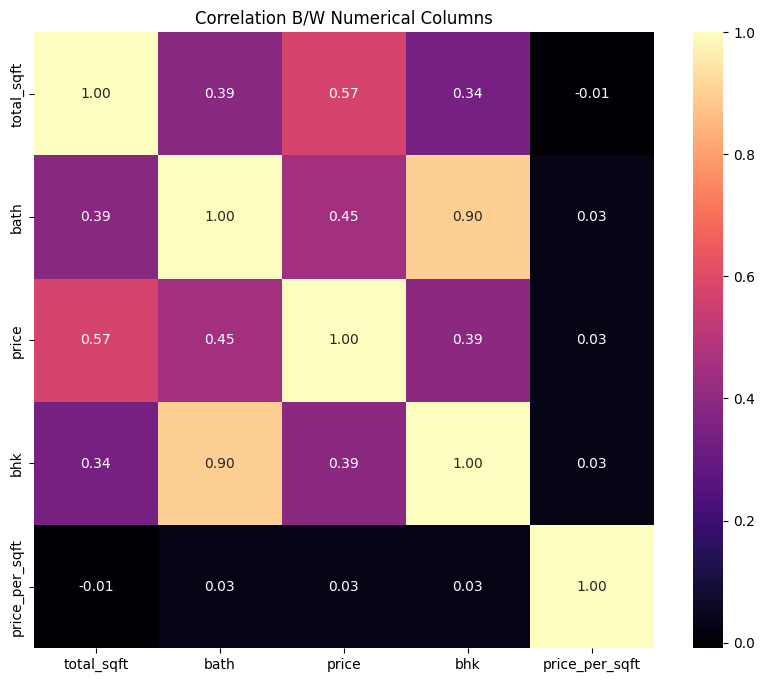

In [419]:
#heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,annot=True,cmap='magma',fmt=".2f")
plt.title('Correlation B/W Numerical Columns')
plt.show()

#### *Firstly, there seems to be a very weak negative correlation (-0.01) between Total Sqft and Price Per Sqft, implying that there's almost no linear relationship between these two variables.

#### *However, Total Sqft shows moderate positive correlations with other key variables such as BHK (0.35), Price (0.57), and Bath (0.39), indicating that as the total square feet increases, the number of bedrooms, the property price, and the number of bathrooms tend to increase as well, though not in a perfectly linear manner.

#### *Bath exhibits a strong positive correlation (0.90) with BHK, suggesting a strong linear relationship between the number of bathrooms and the number of bedrooms. Additionally, Bath also demonstrates moderate positive correlations with Price (0.46) and Total Sqft (0.39), indicating that properties with more bathrooms tend to command higher prices and have larger square feet.

#### *Price also exhibits moderate positive correlations with BHK (0.40) and Total Sqft (0.57), indicating that both the number of bedrooms and the total square footage have a positive impact on property prices, though again, not in a perfectly linear manner.

#### *Overall, these correlation coefficients provide valuable insights into how different factors are interrelated within our dataset, aiding in better understanding and potentially predicting property prices based on their characteristics.

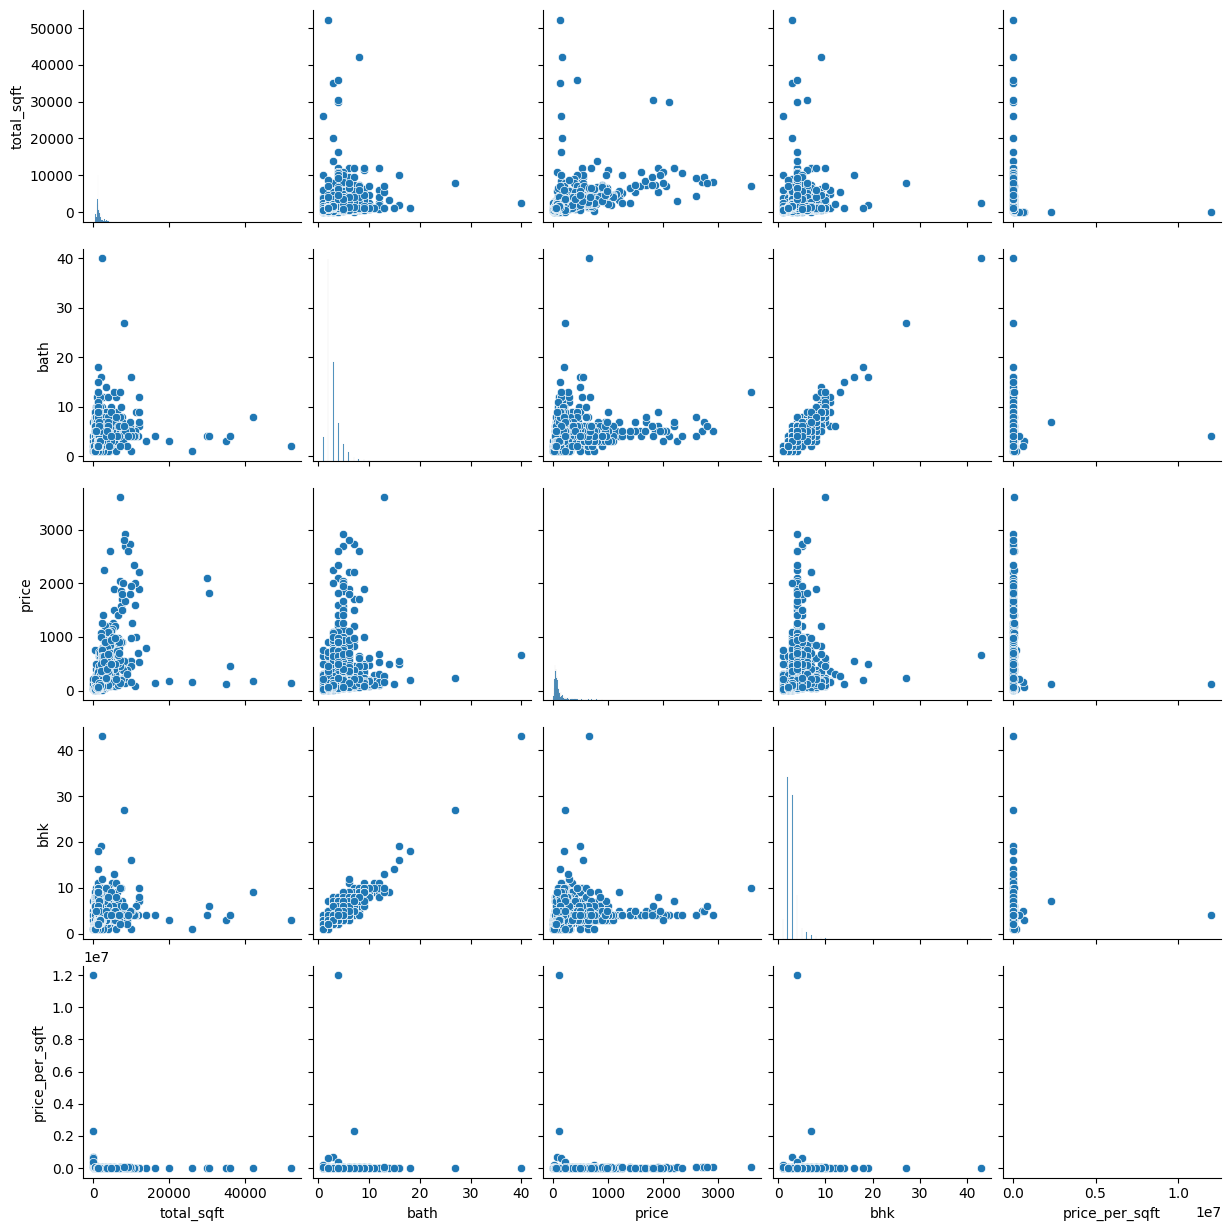

In [410]:
#scatterplot
sns.pairplot(df)
plt.show()
